In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [7]:
wine = load_wine()
x = wine.data
y = wine.target

In [9]:
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df['target'] = wine.target
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [11]:
X = df.drop('target', axis = 1)
Y = df['target']


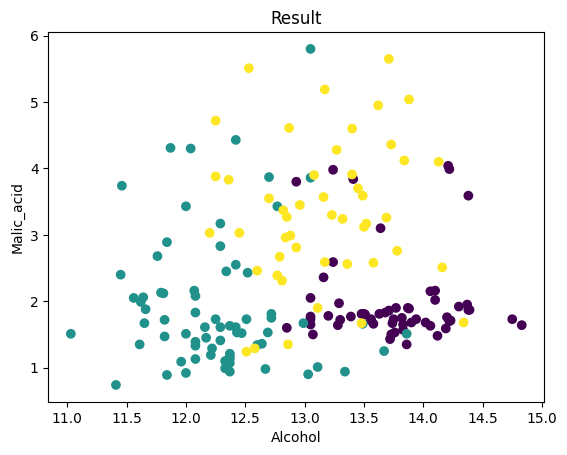

In [12]:
plt.title("Result")
plt.xlabel("Alcohol")
plt.ylabel("Malic_acid")
plt.scatter(df.alcohol, df.malic_acid, c = df['target'])

Result


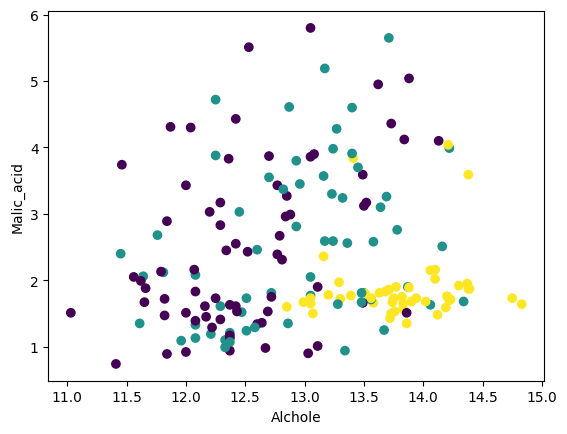

In [14]:
from sklearn.cluster import KMeans
km = KMeans(init = 'random',n_clusters = 3, n_init = 10, max_iter=300 , random_state = 42)
y_predicted = km.fit_predict(X)
print('Result')
plt.xlabel('Alchole')
plt.ylabel('Malic_acid')
plt.scatter(df.alcohol,df.malic_acid, c= km.labels_)
plt.show()


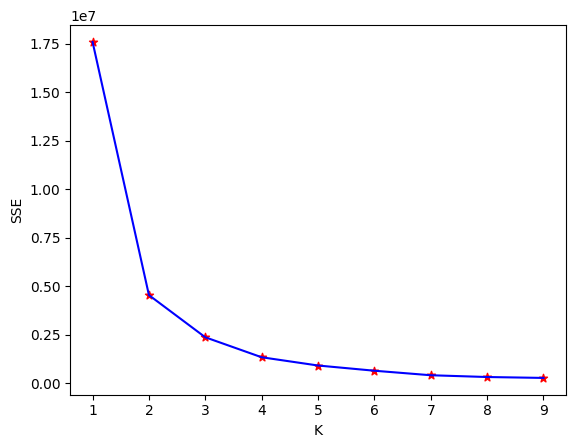

In [16]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 300, random_state = 42)
    km.fit(X)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('SSE')
plt.scatter(k_range, sse , color = 'red', marker = "*")
plt.plot(k_range,sse , color = 'Blue')
plt.show()
#we can see over here that our k value is 3

In [17]:
silhouette = silhouette_score(X,km.labels_)
calinski_harabasz = calinski_harabasz_score(X,km.labels_)
davies_bouldin = davies_bouldin_score(X,km.labels_)
print("Silhouette score is" , silhouette)
print("Calinski Harabasz score is" , calinski_harabasz)
print("Davies Bouldin score is" , davies_bouldin)

Silhouette score is 0.5431736964173112
Calinski Harabasz score is 1322.5249160228336
Davies Bouldin score is 0.5229108899193476


**DBScan**

Result


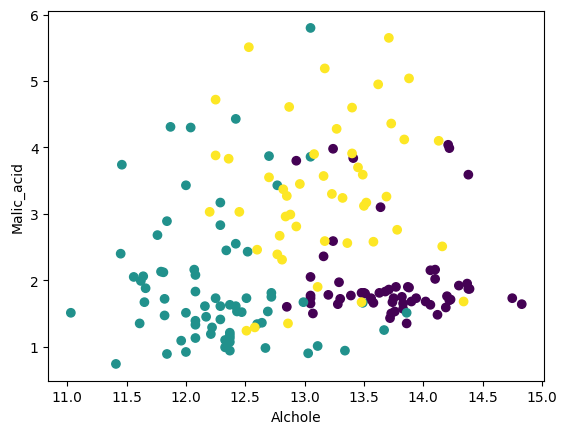

In [21]:
from sklearn.cluster import  DBSCAN
dbscan = DBSCAN(eps=0.5, algorithm='auto', metric='euclidean')
y_pred = dbscan.fit_predict(X)
print('Result')
plt.xlabel('Alchole')
plt.ylabel('Malic_acid')
plt.scatter(df.alcohol,df.malic_acid, c= df['target'])
plt.show()



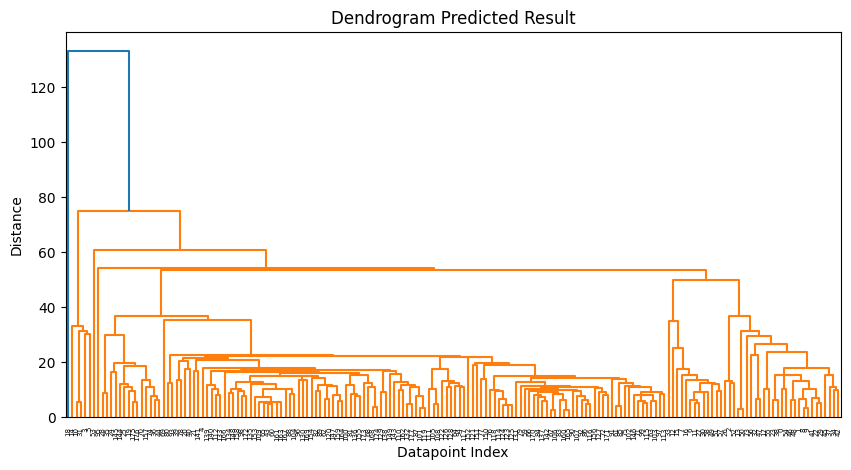

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
plt.figure(figsize=(10, 5))
Z = linkage(X, method='single')
dn = dendrogram(Z)
plt.title('Dendrogram Predicted Result')
plt.xlabel('Datapoint Index')
plt.ylabel('Distance')
plt.show()

In [25]:
labels = fcluster(Z, 3, criterion='maxclust')
silhouette_result = silhouette_score(X, labels)
print("Silhouette Score: ", silhouette_result)
from sklearn.metrics import calinski_harabasz_score
calinski_result = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Score: ", calinski_result)
from sklearn.metrics import davies_bouldin_score
davies_result = davies_bouldin_score(X, labels)
print("Davies-Bouldin Score: ", davies_result)

Silhouette Score:  0.48798203351890634
Calinski-Harabasz Score:  24.42036238154286
Davies-Bouldin Score:  0.30814096183494405
